# Binary Classification to predict breast cancer deciase

In [42]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

breast_data = load_breast_cancer()

df = pd.DataFrame(data=breast_data.data, columns=breast_data.feature_names)

df["class"] = breast_data.target

df["class"].unique()

array([0, 1])

In [3]:
# Shape of the dataset
df.shape

(569, 31)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into target and dataset
X = df.drop("class", axis=1)
y = df["class"]

# Building train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initializing scaler
scaler = StandardScaler()

# Scalling the data (normalization)
scal_X_train = scaler.fit_transform(X_train)
scal_X_test = scaler.fit_transform(X_test)

# Checking for shapes
print(f"Training set: {scal_X_train.shape}")
print(f"Testing set: {scal_X_test.shape}")

Training set: (512, 30)
Testing set: (57, 30)


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set up random seed
tf.random.set_seed(42)

# 1. Create a model 
nn_model = tf.keras.Sequential()

# The Input Layer:
nn_model.add(Dense(64, activation="relu"),)

# The Hidden layers:
nn_model.add(Dense(128, activation="relu"))
nn_model.add(Dense(128, activation="relu"))
nn_model.add(Dense(128, activation="relu"))

# The Output Layer:
nn_model.add(Dense(1,activation='sigmoid'))


# 2. Compile the model
nn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model to learn 
history = nn_model.fit(X_train, y_train, epochs=20, verbose=2, validation_split=0.2)


Epoch 1/20
13/13 - 2s - 165ms/step - accuracy: 0.5648 - loss: 7.6934 - val_accuracy: 0.6214 - val_loss: 1.4524
Epoch 2/20
13/13 - 0s - 7ms/step - accuracy: 0.8264 - loss: 0.9195 - val_accuracy: 0.8738 - val_loss: 0.6776
Epoch 3/20
13/13 - 0s - 8ms/step - accuracy: 0.9144 - loss: 0.3082 - val_accuracy: 0.8932 - val_loss: 0.3700
Epoch 4/20
13/13 - 0s - 7ms/step - accuracy: 0.9120 - loss: 0.3042 - val_accuracy: 0.7476 - val_loss: 0.7798
Epoch 5/20
13/13 - 0s - 7ms/step - accuracy: 0.9095 - loss: 0.3374 - val_accuracy: 0.7864 - val_loss: 0.5181
Epoch 6/20
13/13 - 0s - 6ms/step - accuracy: 0.9144 - loss: 0.2867 - val_accuracy: 0.8058 - val_loss: 0.4949
Epoch 7/20
13/13 - 0s - 6ms/step - accuracy: 0.9120 - loss: 0.2672 - val_accuracy: 0.8155 - val_loss: 0.3981
Epoch 8/20
13/13 - 0s - 6ms/step - accuracy: 0.9193 - loss: 0.2412 - val_accuracy: 0.8252 - val_loss: 0.3813
Epoch 9/20
13/13 - 0s - 6ms/step - accuracy: 0.9193 - loss: 0.2349 - val_accuracy: 0.8544 - val_loss: 0.3528
Epoch 10/20
13/13

In [10]:
# Checking models summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,373 (509.27 KB)

 Trainable params: 43,457 (169.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,916 (339.52 KB)

In [6]:
testing_loss, testing_acc = nn_model.evaluate(X_test, y_test)

print(f"Testing Accuracy: {testing_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9662 - loss: 0.1193 
Testing Accuracy: 0.9649122953414917


## Model Evaluation

In [12]:
# Checking up for model's history while learing 
model_hy =pd.DataFrame(history.history)

## Visualizing the model's accuracy and loss

Text(0.5, 1.0, 'Model Learning curve')

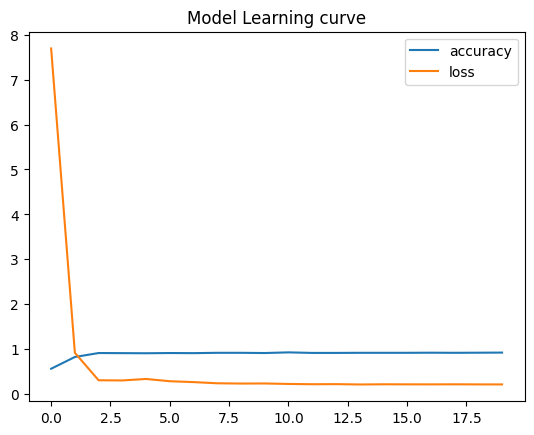

In [15]:
# Plot the models loss function and accuracy
model_hy[["accuracy", "loss"]].plot()
plt.title("Model learning curve")

From the graph , it is clear that:
- the accuracy of the model increased as epochs increased meanse it makes a good predictions
- the loss function goes down means the model is improving

### Finding the ideal learning rate

There are many three main steps to find the idel learing rate
- Adding **callback** to see when it is learning well
- Change the model or create another one
- Modify the currect one

In [37]:

# Set up random seed
tf.random.set_seed(42)

# 1. Creating the same model with callback learning rate callback
nn_model_2 = tf.keras.Sequential()

# The Input Layer:
nn_model_2.add(Dense(64, activation="relu"),)

# The Hidden layers:
nn_model_2.add(Dense(128, activation="relu"))
nn_model_2.add(Dense(128, activation="relu"))
nn_model_2.add(Dense(128, activation="relu"))

# The Output Layer:
nn_model_2.add(Dense(1,activation='sigmoid'))


# 2. Compile the model
nn_model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy']
)

# Creating learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

# It hellps to stop from early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Fit the model to learn 
history_2 = nn_model_2.fit(X_train, 
                           y_train, 
                           epochs=100, 
                           verbose=2, 
                           validation_split=0.2,
                           callbacks=[lr_scheduler, early_stopping]
                           )

Epoch 1/100
13/13 - 2s - 154ms/step - accuracy: 0.3765 - loss: 22.4610 - val_accuracy: 0.3981 - val_loss: 7.9460 - learning_rate: 1.0000e-04
Epoch 2/100
13/13 - 0s - 7ms/step - accuracy: 0.5526 - loss: 3.0921 - val_accuracy: 0.7379 - val_loss: 1.1961 - learning_rate: 1.1220e-04
Epoch 3/100
13/13 - 0s - 7ms/step - accuracy: 0.6626 - loss: 0.7797 - val_accuracy: 0.8544 - val_loss: 0.5245 - learning_rate: 1.2589e-04
Epoch 4/100
13/13 - 0s - 6ms/step - accuracy: 0.8900 - loss: 0.3877 - val_accuracy: 0.8058 - val_loss: 0.3703 - learning_rate: 1.4125e-04
Epoch 5/100
13/13 - 0s - 6ms/step - accuracy: 0.8924 - loss: 0.3171 - val_accuracy: 0.8932 - val_loss: 0.3155 - learning_rate: 1.5849e-04
Epoch 6/100
13/13 - 0s - 6ms/step - accuracy: 0.8606 - loss: 0.3619 - val_accuracy: 0.8932 - val_loss: 0.3079 - learning_rate: 1.7783e-04
Epoch 7/100
13/13 - 0s - 6ms/step - accuracy: 0.8582 - loss: 0.3794 - val_accuracy: 0.9126 - val_loss: 0.2983 - learning_rate: 1.9953e-04
Epoch 8/100
13/13 - 0s - 7ms/st

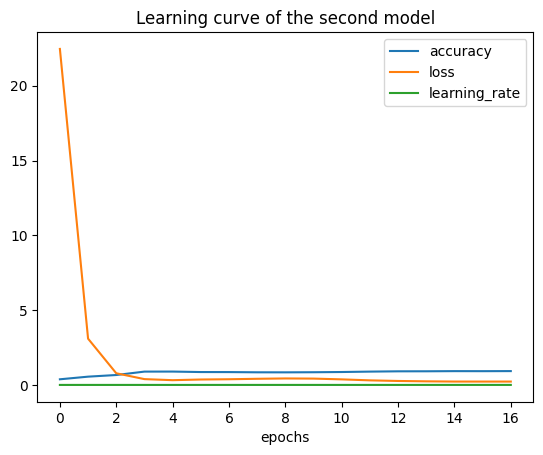

In [38]:
# Ploting the models learing curve
pd.DataFrame(history_2.history)[["accuracy", "loss", "learning_rate"]].plot()
plt.xlabel("epochs")
plt.title("Learning curve of the second model")
plt.show()

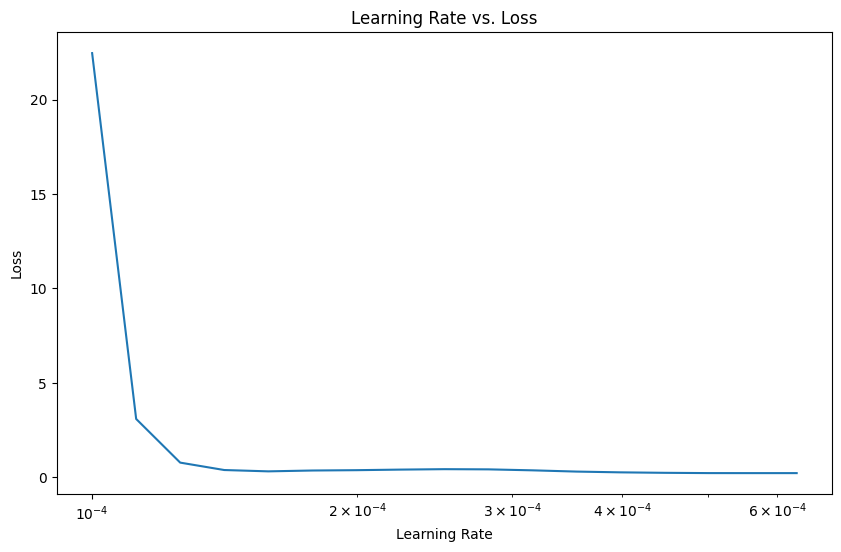

In [39]:
epochs = len(history_2.history["loss"]) 

# Generate learning rates
lrs = 1e-4 * (10 ** (tf.range(epochs) / 20))

# Plotting learning rates vs. loss
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, history_2.history["loss"][:50])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

### Classification Evaluvation Methods
- **Accuracy** - Default metrics for classification models, but not best for imbalanced data
- **Precision** - Higher precision leads to less false positives
- **Recall** - Higher recall leads to less false negatives
- **F1-Score** - It is the combination of both Precision and Recall

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Testing the model with Test set of the dataset
y_pred_prob = nn_model_2.predict(X_test)

# Converting from probability human readable numbers
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy of the model
acc = accuracy_score(y_test, y_pred)

# Precision score
pr = precision_score(y_test,y_pred)

# Recall score
rc = recall_score(y_test, y_pred)

# Priting them
print(f'Accuracy: {acc}')
print(f'Precision: {pr}')
print(f"Recall: {rc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Accuracy: 0.9473684210526315
Precision: 0.9743589743589743
Recall: 0.95


### Confusion matrics

In [52]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# Implement confusion matrix
confusion_matrix(y_test, y_pred)


array([[16,  1],
       [ 2, 38]], dtype=int64)